## Created a chatbot which first classifies what the subject of the topic, then generate either poem, analogy, blogs on the steamlit app.

In [58]:
from typing import TypedDict, Annotated,Literal
from langgraph.graph import START,END,StateGraph
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from langgraph.checkpoint.memory import InMemorySaver
from langgraph.graph.message import add_messages
from langchain_core.messages import BaseMessage
from pydantic import BaseModel, Field
from IPython.display import Image, display


In [59]:

load_dotenv()
gpt_llm= ChatOpenAI(model="gpt-4o-mini")


In [60]:
class MessageClassifier(BaseModel):
    MessageClassifier: Literal["Physics","Maths","Chemistry"] = Field(description="This is a message classfier")

In [61]:
structured_llm=gpt_llm.with_structured_output(MessageClassifier)

In [62]:
class Chatbot(TypedDict):
    messages: Annotated[list[BaseMessage],add_messages]
    MessageClassifier: str



In [63]:
def message_classifier(state:Chatbot)->Chatbot:
   
    prompt=f"Based on the message provided by the user: \n {state['messages']}, classify the message."
   
    response=structured_llm.invoke(prompt)

    return {"MessageClassifier":response.MessageClassifier}

In [64]:
def physics_chatbot(state: Chatbot) -> Chatbot:
    
    prompt= f"You are an intelligent physics chatbot who answers user's questions based on the user query: \n {state['messages']}."
    
    response = gpt_llm.invoke(prompt)
    
    return {'messages':[response]}


In [65]:
def math_chatbot(state: Chatbot) -> Chatbot:
   
    prompt= f"You are an intelligent math chatbot who answers user's questions based on the user query: \n {state['messages']}."

    response = gpt_llm.invoke(prompt)

    return {'messages':[response]}

In [66]:
def chemistry_chatbot(state: Chatbot) -> Chatbot:
   
    prompt= f"You are an intelligent chemistry chatbot who answers user's questions based on the chemistry query: \n {state['messages']}."
    
    response = gpt_llm.invoke(prompt)

    return {'messages':[response]}

In [67]:
def messageclassifier_check(state: Chatbot) -> Literal["physics_chatbot","math_chatbot","chemistry_chatbot"]:
    if state['MessageClassifier']=="Physics":
        return "physics_chatbot"
    elif state['MessageClassifier']=="Maths":
        return "math_chatbot"
    else:
        return "chemistry_chatbot"



In [68]:
checkpoint=InMemorySaver()

graph=StateGraph(Chatbot)
graph.add_node("message_classifier",message_classifier)
graph.add_node("physics_chatbot",physics_chatbot)
graph.add_node("math_chatbot",math_chatbot)
graph.add_node("chemistry_chatbot",chemistry_chatbot)

graph.add_edge(START, "message_classifier")
graph.add_conditional_edges("message_classifier",messageclassifier_check)
graph.add_edge("physics_chatbot", END)
graph.add_edge("math_chatbot", END)
graph.add_edge("chemistry_chatbot", END)
workflow=graph.compile(checkpointer=checkpoint)

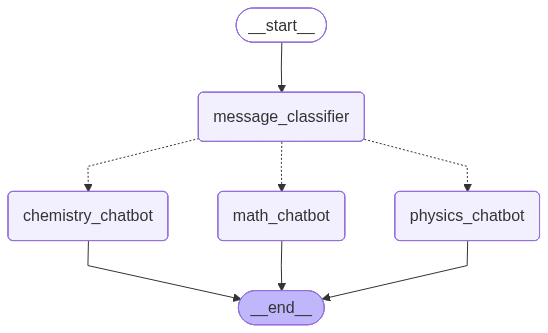

In [69]:
display(Image(workflow.get_graph().draw_mermaid_png()))
CONFIG= {"configurable":{"thread_id":"123"}}

In [70]:
workflow.invoke({"messages":"what is black hole?"},config=CONFIG)

{'messages': [HumanMessage(content='what is black hole?', additional_kwargs={}, response_metadata={}, id='89d471bf-d7db-4d05-a71b-64ef95950a81'),
  AIMessage(content='A black hole is a region in space where the gravitational pull is so strong that nothing, not even light, can escape from it. This extreme gravitational force occurs when a massive star has exhausted its nuclear fuel and collapses under its own gravity. Black holes are defined by their event horizon, which is the boundary beyond which nothing can return.\n\nThere are three main types of black holes:\n\n1. **Stellar Black Holes**: Formed when massive stars collapse after a supernova explosion. They typically have a mass ranging from about 3 to several tens of solar masses.\n\n2. **Supermassive Black Holes**: Found at the centers of most galaxies, including our Milky Way. They can have masses that range from millions to billions of solar masses and are thought to form through the merging of smaller black holes or the direct

In [ ]:
for message_chunk, metadata in workflow.stream({"messages":"what is black hole?"},config=CONFIG, stream_mode="messages"):
    if message_chunk:
        print(message_chunk.content.replace(""),end=" ", flush=False)

 {" Message Classifier ":" Physics "}     A  black  hole  is  a  region  in  space  where  the  gravitational  pull  is  so  intense  that  nothing ,  not  even  light ,  can  escape  it .  This  powerful  gravitational  force  typically  results  from  the  collapse  of  a  massive  star  that  has  exhausted  its  nuclear  fuel ,  leading  to  its  core  collapsing  under  its  own  gravity .

 Black  holes  can  be  categorized  into  three  main  types :

 1 .  ** St ellar  Black  Hol es ** :  These  are  formed  when  massive  stars  undergo  a  super nova  explosion .  Their  mass  usually  ranges  from  about   3  to  several  tens  of  solar  masses .

 2 .  ** Super mass ive  Black  Hol es ** :  Located  at  the  centers  of  most  galaxies ,  including  our  Mil ky  Way ,  super mass ive  black  holes  can  have  masses  ranging  from  millions  to  billions  of  solar  masses .  They  are  believed  to  form  through  the  merging  of  smaller  black  holes  or  the  direct 